# Data set used : Titanic data

In [1]:
# Importing all the necessary packages.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file as a pandas dataframe
titanic_df = pd.read_csv('titanic-data.csv')

In [3]:
# Studying the Titanic data set
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explaining the dataset
The above dataset consists of a list of 891 passengers who were onboard on the Titanic. The above dataset consists of 891 rows and 12 columns. The 12 columns gives the following details about the passengers - 

Passenger Id

Survived - This column gives information whether the concerned passenger had survived the tragedy or not.

           1 ---> The passenger survived
           0 ---> The passenger did not survive

pclass - Passenger Ticket class : Class 1, 2 and 3.

Name   - Name of the passenger

sex    - Sex of the Passenger

Age	   - Age in years of the Passenger

sibsp   - Number of siblings / spouses aboard the Titanic

parch	- Number of parents / children aboard the Titanic

Ticket	- Ticket number

Fare	- Passenger fare

Cabin	- Cabin number

Embarked -	Port of Embarkation shows the port from which the passenger boarded the titanic

           C - Cherbourg
           Q - Queenstown
           S - Southampton

The objective of this project is to find out which factors could have helped in improving the survival chances of the passengers on board. Here , i have tried to find out the survival chances of passengers with respect to the given factors such as sex, Passenger class, port of embarkation, siblings, spouses or parents they had with them during the journey.

# Some questions based on the above data set

1. Which sex had the better chance of survival?
2. Classify the male and female passengers, as adult or child based on their age and find out their chances of survival?
3. Determine the number and proportion of survivors from each port of embarkation.
4. Find the number and proportion of passengers surviving based on the passenger class?
5. Does the passenger fare affect the survival of passengers?
6. Compare the survival rate of children who had parents on board as compared to those who didn't had theirs.
7. Compare the survival rate of people who had siblings on board as compared to those who didn't had theirs.

In [4]:
# To get the idea of total number of rows and columns in the data frame.
titanic_df.shape

(891, 12)

In [5]:
# To get details such as count, maximum, minimum, mean , etc., which helps in improving the analysis.
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data wrangling : Cleaning the data for analysis

As observed from the output of describe function, we see that some of the rows under the age column has no values. So to improve the analysis i have used the df.fillna() function to fill these empty values with the median of the given age values. 

Also the data, for the column under the port of embarkation has some missing values. As the number of passengers from the Southampton port is fairly large in number so here for the analysis i have assumed these passengers port of embarkation as 'S' (Sothampton). 

In [6]:
titanic_df["Age"]= titanic_df["Age"].fillna(titanic_df["Age"].median())
titanic_df["Embarked"] = titanic_df["Embarked"].fillna('S')

# Checking chances of survival of male and female passengers on the ship

In [7]:
sex_count = titanic_df['Sex'].value_counts()
total_males_onboard = sex_count['male']
total_females_onboard = sex_count['female']
Passengers_onboard = titanic_df.groupby('Sex').count()['PassengerId']

print("Total number of males onboard the Titanic : {}.".format(total_males_onboard))
print("Total number of females onboard the Titanic : {}.".format(total_females_onboard))

Total number of males onboard the Titanic : 577.
Total number of females onboard the Titanic : 314.


In [8]:
# To count the number of males and females who survived

survived_sex = titanic_df.groupby('Sex').sum()['Survived']
survived_males = survived_sex['male']
survived_females = survived_sex['female']

print("Number of males survived : {}.".format(survived_males))
print("Number of females survived : {}.".format(survived_females))

Number of males survived : 109.
Number of females survived : 233.


In [9]:
print("Proportion of people suvived : ",(survived_males + survived_females)/(total_males_onboard + total_females_onboard))
print("Proportion of males survived : ", survived_males/total_males_onboard)
print("Proportion of females survived : ",survived_females/total_females_onboard)

Proportion of people suvived :  0.383838383838
Proportion of males survived :  0.188908145581
Proportion of females survived :  0.742038216561


In [10]:
survived_passengers_sex = pd.concat([Passengers_onboard,survived_sex],axis='columns')
survived_passengers_sex.columns.values[0] = 'Passengers onboard'
survived_passengers_sex.columns.values[1] = 'Survived passengers'
survived_passengers_sex

,Passengers onboard,Survived passengers
Sex,,
female,314,233
male,577,109


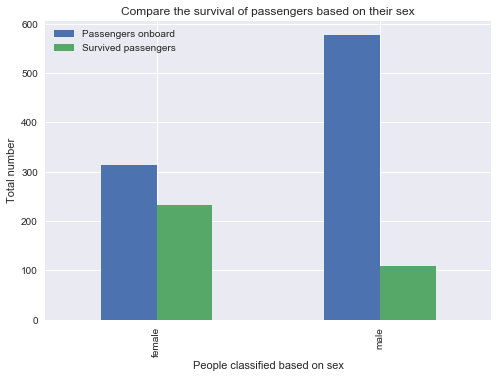

In [11]:
survived_passengers_sex.plot(kind='bar')
plt.xlabel('People classified based on sex')
plt.ylabel('Total number')
plt.title('Compare the survival of passengers based on their sex')

__From the above bar graph__, we can see that the number of male passengers onboard the titanic was more than the number of female passengers onboard. But after the tragedy the number of female survivors were more than the number of male survivors i.e., large number of male passengers had lost their lives as compared to that of the female passengers. 

__From the above analysis we observe__ that there were 577 male passenegers onboard and 314 female passengers onboard the Titanic. But after the tragedy, only 109 out of the 577 male passengers survived and 233 out of the 314 female passengers had survived. So, the chances of survival of female passengers was 74.2% as compared to that of 19% of the male passengers.

__Hence, it can be concluded__ that the chances of survival of female passenegers on the ship were better as compared to that of the male passengers.

__Limitation of this analysis :__ Here we cannot find the cause why chances of survival of female passengers were better than that of the male passengers on the Titanic.

__As a further improvement to this analysis__, we can check which age group of male and female passengers had more chances of survival.

# Classifying the male and female passengers, as adult or child based on their age and finding out their chances of survival.

Here i have classified passengers on the ship based on both their sex and age. I have classifed the passengers both male and female as child if their corresponding age is less than or equal to 18, and have classified them as adults if their corresponding age is greater than 18.


In [12]:
# Creating an additional column in the data frame
# Creating a list to store data
adult_child = []

for i in range(len(titanic_df['Sex'])):
    if titanic_df['Sex'].iloc[i] == 'male':
        if titanic_df['Age'].iloc[i] > 18:
            adult_child.append("Male_adult")
        else:
            adult_child.append("Male_child")
            
    else:
        if titanic_df['Age'].iloc[i] > 18:
            adult_child.append("Female_adult")
        else:
            adult_child.append("Female_child")

titanic_df['adult_child'] = adult_child  # Additional column added to the dataframe

In [13]:
# The modified dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,adult_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Male_adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Female_adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Female_adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Female_adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Male_adult


Taking count of the four categories of passengers based on the classification i have made.

In [14]:
adult_and_children_onboard = titanic_df['adult_child'].value_counts()
adult_and_children_onboard

Male_adult      506
Female_adult    246
Male_child       71
Female_child     68
Name: adult_child, dtype: int64

In [15]:
print("Total number of male adults on the Titanic : {}.".format(adult_and_children_onboard['Male_adult']))
print("Total number of male children on the Titanic : {}.".format(adult_and_children_onboard['Male_child']))
print("Total number of females adults on the Titanic : {}.".format(adult_and_children_onboard['Female_adult']))
print("Total number of females children on the Titanic : {}.".format(adult_and_children_onboard['Female_child']))

Total number of male adults on the Titanic : 506.
Total number of male children on the Titanic : 71.
Total number of females adults on the Titanic : 246.
Total number of females children on the Titanic : 68.


Taking count of the survivors on the Titanic based on the classification.

In [16]:
a = titanic_df['adult_child']
b = titanic_df['Survived']
Survivors = a[b==1]  # Finding the survived people with help of indexing feature in pandas series
print('Clssifying Survivors based on their age and sex')
survived_people = Survivors.value_counts()
survived_people

Clssifying Survivors based on their age and sex


Female_adult    187
Male_adult       85
Female_child     46
Male_child       24
Name: adult_child, dtype: int64

In [17]:
survivors_people_df = pd.concat([adult_and_children_onboard, survived_people], axis=1)
survivors_people_df.columns.values[0] = 'Boarded the Titanic'
survivors_people_df.columns.values[1] = 'Survived'
survivors_people_df

,Boarded the Titanic,Survived
Female_adult,246,187
Female_child,68,46
Male_adult,506,85
Male_child,71,24


In [18]:
# Finding ot the proportion of people (based on the above classifcation) who survived
classification_proportion = survived_people/adult_and_children_onboard
print('Proportion of the people who survived')
classification_proportion

Proportion of the people who survived


Female_adult    0.760163
Female_child    0.676471
Male_adult      0.167984
Male_child      0.338028
Name: adult_child, dtype: float64

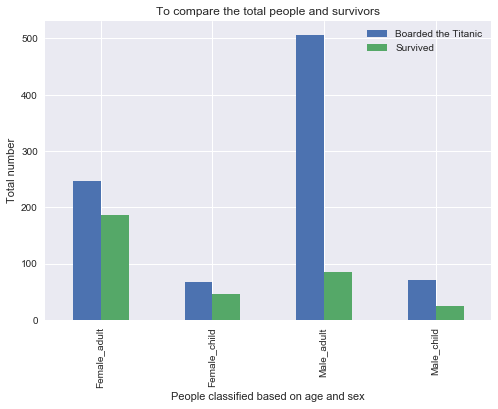

In [19]:
survivors_people_df.plot(kind='bar')
plt.xlabel('People classified based on age and sex')
plt.ylabel('Total number')
plt.title('To compare the total people and survivors')

__The bar graph shows__ the total count of the people concerned who were classified based on their sex and age. From the graph it can be inferred that the number of female adults and children who survived the titanic was more as compared to the number of male adults and male children who survived.



__Results of the analysis and conclusion drawn,__ its found that 506 male adult and 71 boys boarded the titanic out of which only 85 male adults and 24 boys survived. Also, 246 female adults and 68 girls boarded the titanic out of which 187 female adult and 46 girls survived. Also the proportion of the population based on the above classification has also been calculated and it is found that for female adults chances of survival was 76% as compared to 16.7% of the male adults. And for girls on the Titanic chances of survival was 67.6% and for boys it was 33.8%. So in both cases chances of survival was better for the female adults and children.

__Limitation of this analysis :__ But from the above analysis, we cant find people of what age survived the most.
To find that with the help of swarm plot we try to find which age of people survived the most.

In [20]:
# Here I have used the Survived column in the dataframe as the index array to obtain only the sex and age details of each person.
Survivors_age = titanic_df['Age'][titanic_df['Survived']==1]
Survivors_sex = titanic_df['Sex'][titanic_df['Survived']==1]

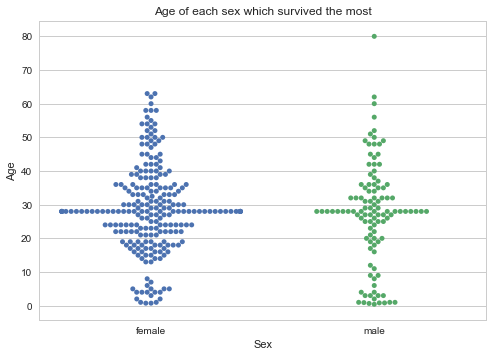

In [21]:
sns.set(style="whitegrid")
sns.swarmplot(x=Survivors_sex, y=Survivors_age)
plt.title('Age of each sex which survived the most')

__From the above swarmplot,__ we conclude age groups between 20 and 30 for both male and female were majority of the survivors and number of survivors in that group for females was very much larger than that for males. In the rest of the ages, the number of female survivors dominate that of the male survivors. Also, only one elderly man of age 80 had survived the tragedy. The rest of the age group of people were between 0 and 65 for both sexes.

__Reference : __ https://seaborn.pydata.org/examples/scatterplot_categorical.html?highlight=scatterplot

# Based on port of embarkation: To determine the survivors from each port

In [22]:
passengers_from_port = titanic_df.groupby('Embarked').count()['PassengerId']
Survivors_each_port = titanic_df.groupby('Embarked').sum()['Survived']
compare_port_survivors = pd.concat([passengers_from_port, Survivors_each_port], axis=1)
compare_port_survivors.columns.values[0] = 'Total_people'   # Rename the 1st column
compare_port_survivors 

,Total_people,Survived
Embarked,,
C,168,93
Q,77,30
S,646,219


In [23]:
print("Number of passengers onboard from Cherbourg : ",passengers_from_port['C'])
print("Number of survivors from Cherbourg : ",Survivors_each_port['C'])
print('\n')
print("Number of passengers onboard from Queenstown : ",passengers_from_port['Q'])
print("Number of survivors from Queenstown : ",Survivors_each_port['Q'])
print('\n')
print("Number of passengers onboard from Southampton : ",passengers_from_port['S'])
print("Number of survivors from Southampton : ",Survivors_each_port['S'])

Number of passengers onboard from Cherbourg :  168
Number of survivors from Cherbourg :  93


Number of passengers onboard from Queenstown :  77
Number of survivors from Queenstown :  30


Number of passengers onboard from Southampton :  646
Number of survivors from Southampton :  219


In [24]:
Proportion_of_survivors_each_port = Survivors_each_port/passengers_from_port
print('Proportion of people survived from port Cherbourg : ',Proportion_of_survivors_each_port['C'] )
print('Proportion of people survived from port Queenstown : ',Proportion_of_survivors_each_port['Q'] )
print('Proportion of people survived from port Southampton : ',Proportion_of_survivors_each_port['S'] )

Proportion of people survived from port Cherbourg :  0.553571428571
Proportion of people survived from port Queenstown :  0.38961038961
Proportion of people survived from port Southampton :  0.339009287926


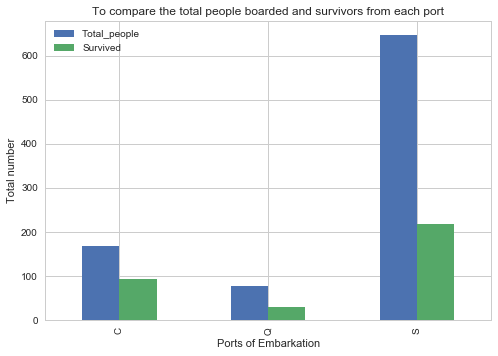

In [25]:
compare_port_survivors.plot(kind='bar')
plt.xlabel('Ports of Embarkation')
plt.ylabel('Total number')
plt.title('To compare the total people boarded and survivors from each port')

__From the above bar graph,__ we see that the number of passengers boarded from Southampton was higher than that boarded from Cherbourg and Queenstown. Also the number of survivors from Southampton was higher than that from Queenstown and Cherbourg.

__Conclusions drawn from the above anlysis,__ we see that 219 of the 646 passengers from Sothampton survived, 30 out of the 77 passengers from Queenstown survived and 93 out of the 168 passengers from Cherbourg survived.
From the proportionality analysis, we conclude that more proportion of the passengers from the port Cherbourg have been saved as compared to the rest of the three ports. And the port of Southampton have faced the maximum casulaty even though it has the maximum survivors.

__Limitations of the above analysis :__  The data given for the port of embarkation had two missing values which i have assumed here to be Sothampton. The analysis is not explain why more number of passengers from Southampton did not survive as compared to the other two ports. As a further improvement to this analysis, we could classify the people boarded from each port on the basis of their age,sex and passenger class and find the survival of people from each port with more accuracy and clarity.


# Passengers surviving from each class
Here i will compare the total number of passengers in each of the three classes of Titanic and compare their number of survivors. 

In [26]:
Passengers_onboard_perclass = titanic_df['Pclass'].value_counts()
Passengers_survived_perclass = titanic_df.groupby('Pclass').sum()['Survived']
compare_survivors_pclass = pd.concat([Passengers_onboard_perclass, Passengers_survived_perclass], axis=1)
compare_survivors_pclass.columns.values[0] = 'Total_people'   # Rename the 1st column
compare_survivors_pclass

,Total_people,Survived
1,216,136
2,184,87
3,491,119


In [27]:
Proportion_of_people_survived_perclass = Passengers_survived_perclass/Passengers_onboard_perclass
print('Proportion of people surviving from Class 1 : ',Proportion_of_people_survived_perclass[1])
print('Proportion of people surviving from Class 2 : ',Proportion_of_people_survived_perclass[2])
print('Proportion of people surviving from Class 3 : ',Proportion_of_people_survived_perclass[3])

Proportion of people surviving from Class 1 :  0.62962962963
Proportion of people surviving from Class 2 :  0.472826086957
Proportion of people surviving from Class 3 :  0.242362525458


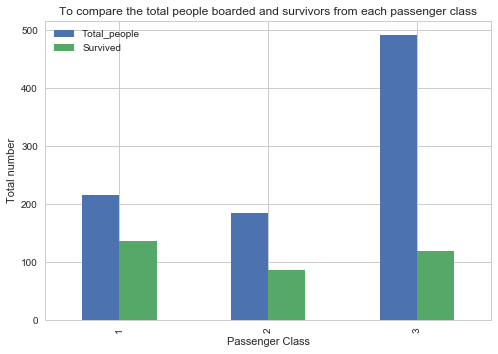

In [28]:
compare_survivors_pclass.plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Total number')
plt.ylabel('Total number')
plt.title('To compare the total people boarded and survivors from each passenger class')

__From the bar graph,__ it can be inferred that more number of passengers travelled from the 3rd class as compared to that travelled from 1st class and 2nd class. But the number of survivors from the 1st class was more than that survived in 2nd class and 3rd class. 

__ Results obtained from the above analysis,__ we see that 136 of 216 passengers from class 1 survived, 87 of the 184 class 2 passengers survived and class 3 had 119 survivors out of the 491 onboarded passengers.  Using proportionality we observe that the passengers belonging to class 1 followed by class 2, had better chances of survival as compared to that of class 3 passengers. 

__Limitations to the above analysis : __The above analysis is not able to explain why more number of 3rd class passengers did not survive as compared to the 1st and 2nd class passengers on the Titanic. 

As a further __improvement to this analysis,__ we can find out how many members of a family (child/parents/siblings/spouse) were in the same class and how many survived. We can also classify each passenger on basis of their age, sex and port of embarkation and find their survival chances.

# Check the number of survivors with respect to the Passenger Fare they paid

Here i am going to check the survival of passengers based on the fares they have given.

The graph below shows the fare range of passengers who boarded on the titanic. I have based the bin range with the help of df.describe() function above which shows the maximum and minimum range of the fares paid.

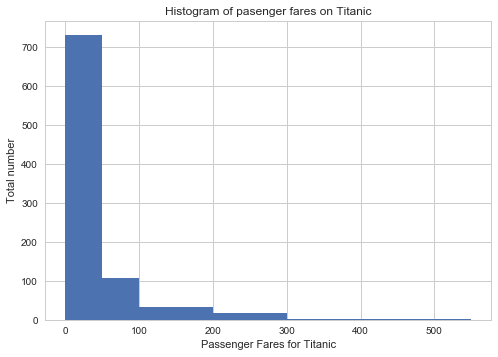

In [29]:
titanic_df['Fare'].hist(bins=[0,50,100,200,300,550])
plt.xlabel('Passenger Fares for Titanic')
plt.ylabel('Total number')
plt.title('Histogram of pasenger fares on Titanic')

The above graph shows that the majority of passengers have paid the passenger fares in the range of 1-50. And very few of them have paid in the range of 300 to 500.

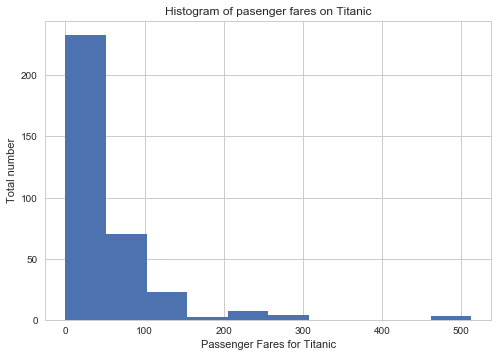

In [30]:
t = []
for i in range(len(titanic_df)):
    if titanic_df['Survived'].iloc[i]:
            t.append(titanic_df['Fare'].iloc[i])
survivors_only_fares = pd.Series(t)
survivors_only_fares.hist()
plt.xlabel('Passenger Fares for Titanic')
plt.ylabel('Total number')
plt.title('Histogram of pasenger fares on Titanic')

__Conclusions from the above graph,__ the passengers who had paid the lesser fares had to face more casuality as compared to those who had paid more. Approxiately, 500 of the passengers who had paid lesser passenger fare had died as compared to those who had paid more. The casuality in the higher passenger fare rates is less.  

__Limitation of this analysis__ is that due to less data available for passengers paying higher fares we can't clearly analyze what happened to the survival of passengers who paid higher fares. If more data was available we could have mapped fare paid to the  passenger class and age. Hence could have found passenger fare for each class and for different age groups or sex.

# Children Survived who had parents aboard the titanic 
Here for analysis age group <=18 has been considered as children. 
For this analysis, i have tried to compare the survival of those children who had parents onboard on the Titanic with them as compared to those who didn't had theirs.

In [31]:
Total_children_onboard = adult_and_children_onboard['Male_child'] + adult_and_children_onboard['Female_child']
Total_survived_children = survived_people['Male_child'] + survived_people['Female_child']

In [32]:
children_with_parents = titanic_df['Survived'].loc[(titanic_df['Parch'] != 0) & 
               ((titanic_df['adult_child'] == 'Male_child') | (titanic_df['adult_child'] == 'Female_child'))].count()

Total_survived_children_with_parents = titanic_df['Survived'].loc[(titanic_df['Survived'] > 0) & (titanic_df['Parch'] > 0) & 
               ((titanic_df['adult_child'] == 'Male_child') | (titanic_df['adult_child'] == 'Female_child'))].sum()

children_without_parents = titanic_df['Survived'].loc[(titanic_df['Parch'] == 0) & 
               ((titanic_df['adult_child'] == 'Male_child') | (titanic_df['adult_child'] == 'Female_child'))].count()

Total_survived_children_without_parents = titanic_df['Survived'].loc[(titanic_df['Survived'] > 0) & (titanic_df['Parch'] == 0) & 
               ((titanic_df['adult_child'] == 'Male_child') | (titanic_df['adult_child'] == 'Female_child'))].sum()


In [33]:
print('Total Children onboard : ',Total_children_onboard)
print('Total survived children : ',Total_survived_children)
print('\n')
print('Children with parents onboard : ',children_with_parents)
print('Survived children who had parents onboard : ',Total_survived_children_with_parents)
print('\n')
print('Children without parents onboard : ',children_without_parents)
print('Survived children without parents onboard : ',Total_survived_children_without_parents)    


Total Children onboard :  139
Total survived children :  70


Children with parents onboard :  89
Survived children who had parents onboard :  50


Children without parents onboard :  50
Survived children without parents onboard :  20


In [34]:
print('Proportion of children survived who had parents onboard : ',Total_survived_children_with_parents/children_with_parents)
print('Proportion of children survived without parents onboard : ',
      Total_survived_children_without_parents/children_without_parents)

Proportion of children survived who had parents onboard :  0.561797752809
Proportion of children survived without parents onboard :  0.4


__Results obtained from the above anlysis,__ i found out that out of the 139 children onboard only 70 had survived. Of these 50 (out of 89) of the survivng children had parents onboard with them and  20 out of 50 chidren who did not have parents onboard with them on titanic survived.

__Conclusion drawn : __ the children who had parents onboard with them had a slightly better chance of survival as compared to those who didn't had theirs.

__Limitations to the above anlaysis : __ we can't tell which child's parents survived and which parents' child survived as there is no mapping between parents to their respective children in the given dataset. Hence, i have limited my analysis to the survival of children who had their parents onboard with them and not. 

# Survival chances of people who had siblings/spouses onboard

Here i have tried to compare the survival chances of people who had their siblings/spouses on their boards with those who didn't had theirs.

In [35]:
people_with_sibsp = titanic_df['SibSp'].loc[titanic_df['SibSp']>0].count()
survived_sibsp = titanic_df['Survived'].loc[(titanic_df['SibSp']>0) & (titanic_df['Survived']==1)].sum()
survived_without_sibsp = titanic_df['Survived'].loc[(titanic_df['SibSp']==0) & (titanic_df['Survived']==1)].sum()
people_without_sibsp = titanic_df['PassengerId'].count() - people_with_sibsp

In [36]:

print("Total people with siblings/spouse onboard : ",people_with_sibsp)
print("Survived people with siblings/spouse onboard : ",survived_sibsp)
print('\n')
print("Total people without any siblings/spouse onboard : ",people_without_sibsp)
print("Survived people without siblings/spouse onboard : ",survived_without_sibsp)
print('\n')

print("Proportion of survived people having siblings/spouse on board : ", survived_sibsp/people_with_sibsp)
print("Proportion of survived people without siblings/spouse on board : ", survived_without_sibsp/people_without_sibsp)



Total people with siblings/spouse onboard :  283
Survived people with siblings/spouse onboard :  132


Total people without any siblings/spouse onboard :  608
Survived people without siblings/spouse onboard :  210


Proportion of survived people having siblings/spouse on board :  0.466431095406
Proportion of survived people without siblings/spouse on board :  0.345394736842


__Results obtained from the above analysis,__ was aimed at finding out the chances of survival of those people who had their siblings/spouses onboard with them on titanic. So 132 out of 283 people having siblins/spouses onboard survived. And 210 out of 608 people having no siblins/spouses onboard survived.

__Conclusions from the above analysis__ that the chances of survival would have been slightly better for people who had their siblings/spouses onboard with them on the Titanic as compared to those who didn't had.

__Limitations of the above analysis__ that we cannot differentiate whether the concerned parties where siblings or spouses. So we cannot match how many of a person's siblings survived or which one of the spouses or siblings survived. 

__As a further improvement to this analysis__ if the above mentioned limitations were corrected we could have mapped a person to his family(child/parents/siblings/spouse) and could have found out how many menbers of that family survived and who all didn't and in which passenger class they boarded the Titanic, their port of embarkation and the total fare they paid.  

# Conclusion Part

__Answers to the questions obtained after the analysis :__

1. The female passengers on the Titanic had better chances of survival than the male passenegrs. The chances of survival of female passengers was 74.2% as compared to that of 19% of the male passengers.

2.  After classifying the male and female passengers as adults and children its found after the analysis that the number of female adults and children who survived the titanic was more as compared to the number of male adults and male children who survived. For female adults chances of survival was 76% as compared to 16.7% of the male adults. And for girls on the Titanic chances of survival was 67.6% and for boys it was 33.8%. It is also found that age groups between 20 and 30 for both male and female were majority of the survivors and number of survivors in that group for females was very much larger than that for males. 

3. From the above analysis, it is found that 19 of the 646 passengers from Southampton survived, 30 out of the 77 passengers from Queenstown survived and 93 out of the 168 passengers from Cherbourg survived. From the proportionality analysis, we conclude that more proportion of the passengers from the port Cherbourg have been saved i.e., 55.3% as compared to the rest of the two ports 38% and 33% for Queenstown and Southampton respectively. And the port of Southampton have faced the maximum casulaty even though it has the maximum survivors.

4. From the above analysis, it is found that 136 of 216 passengers from class 1 survived, 87 of the 184 class 2 passengers survived and class 3 had 119 survivors out of the 491 onboarded passengers. Using proportionality we observe that the passengers belonging to class 1 followed by class 2, had better chances of survival as compared to that of class 3 passengers.

5. the passengers who had paid the lesser fares had to face more casuality as compared to those who had paid more. Approxiately, 500 of the passengers who had paid lesser passenger fare had died as compared to those who had paid more. The casuality in the higher passenger fare rates is less.

6.  The children who had parents onboard with them had a slightly better chance of survival as compared to those who didn't had theirs. From the proportions, it is found that children having parents onboard had survival chances of 56% as compared to the 40% of those children not having their parents onboard.

7. The chances of survival was slightly better for people who had their siblings/spouses onboard with them on the Titanic as compared to those who didn't had their siblins/spouse onboard. From the proportions, it is found that people with siblings/spouses onboard had survival chances of 46% as compared to the 34% of those who did not had their siblings/spouses onboard.

__Limitations of the above analysis :__

1. Data was missing from the age column and port of embarkation.
2. Due to the limited amount of data and information present no relationships between passengers was made. Example who were the parents of a child or who was a particular persons'spouse or sibling or parent.